# Modelos de Regresion

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression


In [33]:
data = pd.read_csv('C:/Users/framirezs/Downloads/EDA_factorizado.csv')

In [34]:
data.head(), data.info(), data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211039 entries, 0 to 211038
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        211039 non-null  int64  
 1   fecha             211039 non-null  object 
 2   codigo            211039 non-null  int64  
 3   talla             211039 non-null  int64  
 4   color             211039 non-null  int64  
 5   coleccion         211039 non-null  int64  
 6   categoria         211039 non-null  int64  
 7   linea             211039 non-null  int64  
 8   cantidad          211039 non-null  float64
 9   ciudad            211039 non-null  int64  
 10  refext            211039 non-null  int64  
 11  clase de cliente  211039 non-null  int64  
 12  TD                211039 non-null  float64
 13  IPC               211039 non-null  float64
 14  precio            211039 non-null  float64
 15  anio              211039 non-null  int64  
 16  mes               21

(   Unnamed: 0       fecha  codigo  talla  color  coleccion  categoria  linea  \
 0           0  2020-02-29       0      0      0          0          0      0   
 1           1  2020-02-29       0      0      1          1          1      0   
 2           2  2020-02-29       0      1      2          1          1      0   
 3           3  2020-02-29       0      1      3          1          2      0   
 4           4  2020-02-29       0      2      2          1          2      0   
 
    cantidad  ciudad  refext  clase de cliente        TD       IPC    precio  \
 0 -0.448842       0       0                 0  0.232422 -0.297552  0.659816   
 1 -0.448842       0       1                 0  0.232422 -0.297552 -1.740728   
 2 -0.448842       0       1                 0  0.232422 -0.297552 -0.313348   
 3  1.263868       0       2                 0  0.232422 -0.297552 -1.300343   
 4 -0.448842       0       3                 0  0.232422 -0.297552  0.376902   
 
    anio  mes  dia_semana   IS

In [35]:
# Eliminación de columnas innecesarias
data = data.drop(columns=['Unnamed: 0'])

# Conversión de 'fecha' a tipo datetime si es necesario
if data['fecha'].dtype == 'object':
    data['fecha'] = pd.to_datetime(data['fecha'])

In [36]:
from sklearn.model_selection import train_test_split

# Definir las variables independientes (X) y la variable dependiente (y)
X = data.drop(columns=['cantidad', 'fecha'])  # Excluyendo 'cantidad' y 'fecha'
y = data['cantidad']

# Dividir los datos en conjunto de entrenamiento y conjunto temporal (85% y 15%)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Dividir el conjunto temporal en conjunto de entrenamiento y de validación (82.35% y 17.65% de 85%)
# Esto resultará en 70% para entrenamiento, 15% para prueba y 15% para validación del conjunto original
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1765, random_state=42)

X_train.shape, X_test.shape, X_val.shape


((147721, 16), (31656, 16), (31662, 16))

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo de regresión lineal
linear_model = LinearRegression()

# Entrenar el modelo con el conjunto de entrenamiento
linear_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de entrenamiento y de prueba
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Calcular métricas de rendimiento
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


mse_train, mse_test, r2_train, r2_test


(0.7639827635484502,
 0.8044325358818427,
 0.22636364303959167,
 0.23124042884579754)

In [9]:
import statsmodels.api as sm

# Añadir una columna constante para el intercepto
X_train_sm = sm.add_constant(X_train)

# Crear el modelo con statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Obtener el resumen del modelo para ver los p-valores y otras estadísticas
model_summary = model_sm.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               cantidad   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     2701.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:08:51   Log-Likelihood:            -1.8972e+05
No. Observations:              147721   AIC:                         3.795e+05
Df Residuals:                  147704   BIC:                         3.796e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -49.8206     12.265     -4.062      0.000     -73.860     -25.781
codigo               0.0017   2.81e-05     60.748      0.000       0.002       0.002
talla                0.0122      0.001     17.833      0.000       0.011       0.014
color               -0.0017      0.000     -9.048      0.000      -0.002      -0.001
coleccion           -0.0054      0.002     -3.142      0.002      -0.009      -0.002
categoria            0.0020      0.000      8.736      0.000       0.002       0.002
linea                0.0222      0.006      3.704      0.000       0.010       0.034
ciudad              -0.0055   5.26e-05   -105.069      0.000      -0.006      -0.005
refext              -0.0001   3.18e-05     -4.415      0.000      -0.000    -7.8e-05
clase de cliente     0.3194      0.007     42.609      0.000       0.305       0.334
TD                  -0.0099      0.005     -1.825      0.068      -0.021       0.001
IPC                 -0.0105      0.005     -1.914      0.056      -0.021       0.000
precio              -0.0706      0.003    -27.626      0.000      -0.076      -0.066
anio                 0.0244      0.006      4.021      0.000       0.013       0.036
mes                  0.0019      0.001      2.419      0.016       0.000       0.003
dia_semana           0.0015      0.001      1.070      0.285      -0.001       0.004
ISE_pca             -0.0147      0.005     -2.951      0.003      -0.024      -0.005
==============================================================================
Omnibus:                    60365.437   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           295192.811
Skew:                           1.959   Prob(JB):                         0.00
Kurtosis:                       8.711   Cond. No.                     1.10e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
def backward_elimination(data, target, significance_level=0.05):
    """Realiza la eliminación hacia atrás utilizando p-valores."""
    features = data.columns.tolist()
    while len(features) > 0:
        # Añadir constante y ajustar el modelo
        X = sm.add_constant(data[features])
        p_values = sm.OLS(target, X).fit().pvalues[1:]  # Excluir la constante

        # Obtener el máximo p-valor y su correspondiente variable
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    
    return features

# Realizar la eliminación hacia atrás
selected_features_backward = backward_elimination(X_train, y_train)
selected_features_backward


['codigo',
 'talla',
 'color',
 'coleccion',
 'categoria',
 'linea',
 'ciudad',
 'refext',
 'clase de cliente',
 'precio',
 'anio',
 'mes',
 'ISE_pca']

In [11]:
def forward_selection(data, target, significance_level=0.05):
    """Realiza la selección hacia adelante utilizando p-valores."""
    initial_features = data.columns.tolist()
    selected_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(selected_features))
        new_pval = pd.Series(index=remaining_features)

        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[selected_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]

        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            selected_feature = new_pval.idxmin()
            selected_features.append(selected_feature)
            initial_features.remove(selected_feature)
        else:
            break
    
    return selected_features

# Realizar la selección hacia adelante
selected_features_forward = forward_selection(X_train, y_train)
selected_features_forward


['codigo',
 'ciudad',
 'clase de cliente',
 'precio',
 'talla',
 'ISE_pca',
 'color',
 'categoria',
 'refext',
 'linea',
 'anio',
 'coleccion',
 'mes']

In [38]:
# Modelo con Backward Elimination
X_train_backward = X_train[selected_features_backward]
X_test_backward = X_test[selected_features_backward]
model_backward = sm.OLS(y_train, sm.add_constant(X_train_backward)).fit()
y_pred_backward = model_backward.predict(sm.add_constant(X_test_backward))

# Obtener el resumen del modelo para ver los p-valores y otras estadísticas
model_summary = model_backward.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               cantidad   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     3324.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:03:46   Log-Likelihood:            -1.8973e+05
No. Observations:              147721   AIC:                         3.795e+05
Df Residuals:                  147707   BIC:                         3.796e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -30.4038      7.858     -3.869      0.000     -45.806     -15.002
codigo               0.0017   2.79e-05     61.251      0.000       0.002       0.002
talla                0.0122      0.001     17.832      0.000       0.011       0.014
color               -0.0017      0.000     -9.005      0.000      -0.002      -0.001
coleccion           -0.0041      0.002     -2.570      0.010      -0.007      -0.001
categoria            0.0020      0.000      8.706      0.000       0.002       0.002
linea                0.0224      0.006      3.728      0.000       0.011       0.034
ciudad              -0.0055   5.25e-05   -105.228      0.000      -0.006      -0.005
refext              -0.0001   3.17e-05     -4.470      0.000      -0.000   -7.95e-05
clase de cliente     0.3179      0.007     42.951      0.000       0.303       0.332
precio              -0.0705      0.003    -27.648      0.000      -0.075      -0.065
anio                 0.0148      0.004      3.806      0.000       0.007       0.022
mes                  0.0019      0.001      2.525      0.012       0.000       0.003
ISE_pca             -0.0195      0.003     -6.185      0.000      -0.026      -0.013
==============================================================================
Omnibus:                    60325.011   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           294743.421
Skew:                           1.957   Prob(JB):                         0.00
Kurtosis:                       8.706   Cond. No.                     7.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# Modelo con Forward Selection
X_train_forward = X_train[selected_features_forward]
X_test_forward = X_test[selected_features_forward]
model_forward = sm.OLS(y_train, sm.add_constant(X_train_forward)).fit()
y_pred_forward = model_forward.predict(sm.add_constant(X_test_forward))

# Obtener el resumen del modelo para ver los p-valores y otras estadísticas
model_summary = model_forward.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               cantidad   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     3324.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:04:12   Log-Likelihood:            -1.8973e+05
No. Observations:              147721   AIC:                         3.795e+05
Df Residuals:                  147707   BIC:                         3.796e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -30.4038      7.858     -3.869      0.000     -45.806     -15.002
codigo               0.0017   2.79e-05     61.251      0.000       0.002       0.002
ciudad              -0.0055   5.25e-05   -105.228      0.000      -0.006      -0.005
clase de cliente     0.3179      0.007     42.951      0.000       0.303       0.332
precio              -0.0705      0.003    -27.648      0.000      -0.075      -0.065
talla                0.0122      0.001     17.832      0.000       0.011       0.014
ISE_pca             -0.0195      0.003     -6.185      0.000      -0.026      -0.013
color               -0.0017      0.000     -9.005      0.000      -0.002      -0.001
categoria            0.0020      0.000      8.706      0.000       0.002       0.002
refext              -0.0001   3.17e-05     -4.470      0.000      -0.000   -7.95e-05
linea                0.0224      0.006      3.728      0.000       0.011       0.034
anio                 0.0148      0.004      3.806      0.000       0.007       0.022
coleccion           -0.0041      0.002     -2.570      0.010      -0.007      -0.001
mes                  0.0019      0.001      2.525      0.012       0.000       0.003
==============================================================================
Omnibus:                    60325.011   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           294743.421
Skew:                           1.957   Prob(JB):                         0.00
Kurtosis:                       8.706   Cond. No.                     7.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error

# Definir alphas para la validación cruzada
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Regresión Ridge
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Regresión Lasso
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# Regresión Elastic Net
elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=[0.2, 0.5, 0.8], cv=5, random_state=42)
elastic_net_cv.fit(X_train, y_train)

# Evaluar los modelos
y_test_pred_ridge = ridge_cv.predict(X_test)
y_test_pred_lasso = lasso_cv.predict(X_test)
y_test_pred_elastic_net = elastic_net_cv.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
mse_elastic_net = mean_squared_error(y_test, y_test_pred_elastic_net)

ridge_alpha = ridge_cv.alpha_
lasso_alpha = lasso_cv.alpha_
elastic_net_alpha = elastic_net_cv.alpha_
elastic_net_l1_ratio = elastic_net_cv.l1_ratio_

mse_ridge, mse_lasso, mse_elastic_net, ridge_alpha, lasso_alpha, (elastic_net_alpha, elastic_net_l1_ratio)


(0.8044329425363064,
 0.8045477218836908,
 0.804457564774405,
 10.0,
 0.001,
 (0.001, 0.2))

In [41]:
# Identificar las variables que se mantuvieron (coeficientes no reducidos a cero) en el modelo Lasso
elastic_coef = pd.Series(elastic_net_cv.coef_, index=X_train.columns)

# Variables mantenidas y sus coeficientes
variables_mantenidas = elastic_coef[elastic_coef != 0]
variables_mantenidas.sort_values(ascending=False)

clase de cliente    0.314225
anio                0.020945
linea               0.020936
talla               0.012214
categoria           0.001994
mes                 0.001806
codigo              0.001722
dia_semana          0.001361
refext             -0.000139
color              -0.001708
coleccion          -0.004672
ciudad             -0.005525
TD                 -0.007016
IPC                -0.007574
ISE_pca            -0.016020
precio             -0.070225
dtype: float64

In [24]:
# Obtener el resumen del modelo para ver los p-valores y otras estadísticas
model_summary = lasso_coef.summary()
model_summary

AttributeError: 'Series' object has no attribute 'summary'

In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
 
# Preparar las características de toda la base de datos (excluyendo 'cantidad' y 'fecha')
X_full = data.drop(['cantidad', 'fecha'], axis=1)  # Asumiendo que estas son las características
 
# Hacer predicciones sobre toda la base de datos
Y_pred_full = elastic_net_cv.predict(X_full)
 
# Agregar las predicciones al DataFrame original para análisis
data['proyeccion'] = Y_pred_full

# Calcular las métricas para las predicciones en toda la base de datos
r2_full = r2_score(data['cantidad'], data['proyeccion'])
mse_full = mean_squared_error(data['cantidad'], data['proyeccion'])
mape_full = mean_absolute_percentage_error(data['cantidad'], data['proyeccion'])
 
# Imprimir los resultados de las métricas
print(f"R2 score (toda la base de datos): {r2_full:.2f}")
print(f"MSE (toda la base de datos): {mse_full:.2f}")
print(f"MAPE (toda la base de datos): {mape_full:.2f}")

R2 score (toda la base de datos): 0.23
MSE (toda la base de datos): 0.77
MAPE (toda la base de datos): 0.78


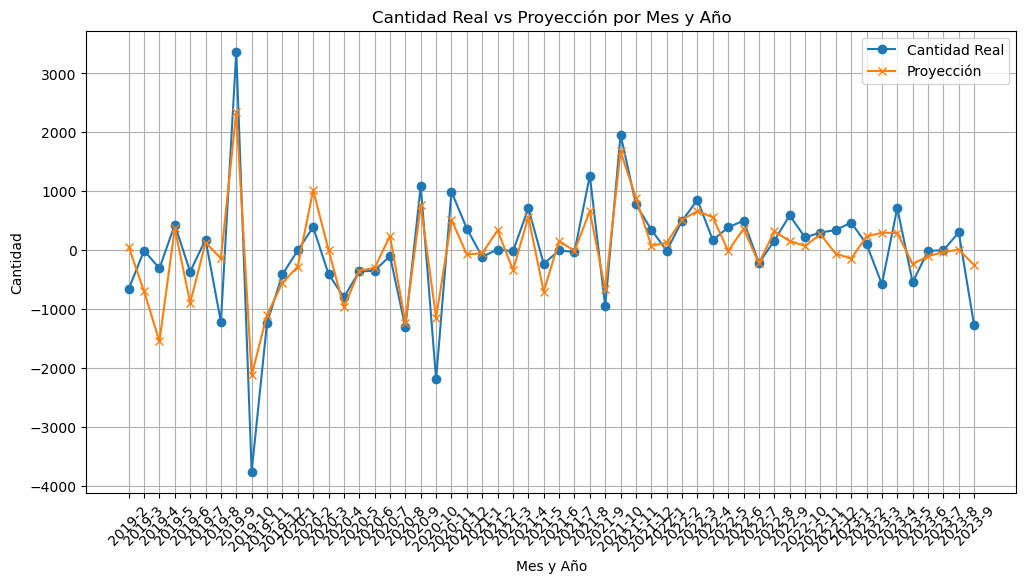

In [43]:
# Asegurarse de que 'fecha', 'anio', y 'mes' están en data
data['fecha'] = pd.to_datetime(data['fecha'])
data['anio'] = data['fecha'].dt.year
data['mes'] = data['fecha'].dt.month
 
# Agregar las predicciones a la base de datos completa
data['proyeccion'] = Y_pred_full
 
# Agrupar los datos originales y sumar las cantidades reales
df_agrupado_real = data.groupby(['anio', 'mes'])[['cantidad']].sum().reset_index()
 
# Agrupar data y sumar las proyecciones
df_agrupado_proyeccion = data.groupby(['anio', 'mes'])[['proyeccion']].sum().reset_index()
 
# Fusionar los resultados reales y las proyecciones
df_agrupado = pd.merge(df_agrupado_real, df_agrupado_proyeccion, on=['anio', 'mes'])
 
# Crear el gráfico de cantidades reales vs. proyecciones por mes y año
plt.figure(figsize=(12, 6))
plt.plot(df_agrupado['anio'].astype(str) + '-' + df_agrupado['mes'].astype(str), df_agrupado['cantidad'], label='Cantidad Real', marker='o')
plt.plot(df_agrupado['anio'].astype(str) + '-' + df_agrupado['mes'].astype(str), df_agrupado['proyeccion'], label='Proyección', marker='x')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad')
plt.title('Cantidad Real vs Proyección por Mes y Año')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()